In [2]:
#Load in the necessary Libraries 
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import csv
import math

In [3]:
#Load in the Temperature Data as a list of lists
data_file = open("B6data.csv","r")
temp_csvdata = csv.reader(data_file)
temp_data = []

for row in temp_csvdata:
    temp_data.append(row)
    
# movie_titles_list
data_file.close()
# print(temp_data)

In [5]:
#Plot the Temperature Data

starting_year = int(temp_data[0][0])

#separate out the temperature data like as the x-(years) and y-(temperatures) axes
years = []
temperatures = []
for i in range(0,len(temp_data)):
    years.append(int(temp_data[i][0]))
    temperatures.append(float(temp_data[i][1]))

#create arrays for matrix multiplication

x = np.array(years)
y = np.array(temperatures)


print(x,y)


[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021] [-0.17 -0.09 -0.11 -0.18 -0.28 -0.33 -0.31 -0.36 -0.17 -0.1  -0.35 -0.22
 -0.27 -0.31 -0.31 -0.23 -0.11 -0.11 -0.27 -0.18 -0.08 -0.16 -0.27 -0.36
 -0.46 -0.26 -0.22 -0.38 -0.42 -0.48 -0.43 -0.44 -0.36 -0.35 -0.16 -0.14
 -0.36 -0.46 -0.3  -0.27 -0.27 -0.18 -0.28 -0.27 -0.27 -0.2

In [7]:
#calculate slope (a or m) and y-intercept (b)
#INSTEAD OF USING a I USED m
n = len(x)
m = ( np.sum(x*y) - np.sum(y)*np.sum(x)/n ) / ( np.sum(x*x) - np.sum(x)*np.sum(x)/n )
b = ( np.sum(y) - m*np.sum(x) )/n
print('m = %.2f' % m, 'b = %.2f' % b)
# print('m = %.2f' % m)

m = 0.01 b = -14.87


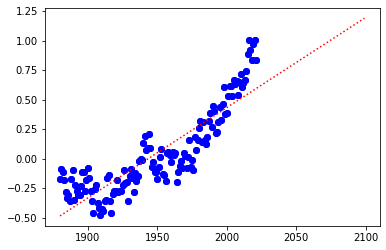

In [8]:
#Part 2a - plot the best fit at the polynomial degree of 1 (mx+b)
plt.plot(x,y,'bo')

xe = np.arange(starting_year,2100)
ye = m*xe + b

plt.plot(x,y,'bo')
plt.plot(xe,ye,'r:')
plt.show()

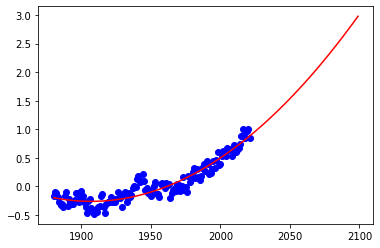

[ 8.77584234e-05 -3.34694145e-01  3.18854932e+02]


In [9]:
# Part 2b - plot the best fit at a polynomial degree of 2 (ax^2 + bx + c )

# your least-squares estimation code here (2 lines)
X = np.stack( (np.square(x), x, np.ones(n)), axis=1)
u = inv(np.transpose(X)@X)@np.transpose(X)@y

# plot data and least-squares fit
xp = np.arange(starting_year,2100)
yp = u[0]*xp*xp + u[1]*xp + u[2]
plt.plot(x,y,'bo') # original data
plt.plot( xp, yp, 'r-' ) # second-order polynomial fit
plt.show()
print(u)

In [10]:
# Part 2c - In what years will the temperature anomaly reach 1.5℃ and 2℃ 

#find the year years when it's less than or equal to 1.5 degrees celcius
values = max(np.where(yp <= 1.5))
print(values)
year_difference = len(values)-1
closest_estimate = starting_year+year_difference
print("The estimated year that the temperature will be 1.5℃ is "+str(closest_estimate))

#find the year when it's 2 degrees celcius
values = max(np.where(yp <= 2))
year_difference = len(values)-1
closest_estimate = starting_year+year_difference
print("The estimated year that the temperature will be 2℃ is "+str(closest_estimate))




[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168]
The estimated year that the temperature will be 1.5℃ is 2048
The estimated year that the temperature will be 2℃ is 2067


The estimated year that the temperature will be 1.5℃ is 2038
The estimated year that the temperature will be 2℃ is 2051


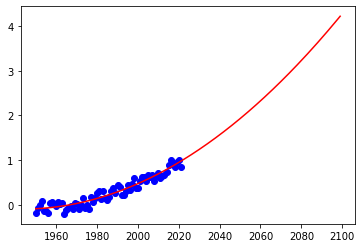

In [88]:
# Part 2d - Repeat the analysis in parts (b-c) using only data from 1950-2021. 

starting_year = 1950

years = []
temperatures = []
for i in range(0,len(temp_data)):
    if int(temp_data[i][0])>=starting_year:
        years.append(int(temp_data[i][0]))
        temperatures.append(float(temp_data[i][1]))

#create arrays for matrix multiplication

x = np.array(years)
y = np.array(temperatures)
n = len(x)

# print(x,y)


# your least-squares estimation code here (2 lines)
X = np.stack( (np.square(x), x, np.ones(n)), axis=1)
u = inv(np.transpose(X)@X)@np.transpose(X)@y

# plot data and least-squares fit
xp = np.arange(starting_year,2100)
yp = u[0]*xp*xp + u[1]*xp + u[2]
plt.plot(x,y,'bo') # original data
plt.plot( xp, yp, 'r-' ) # second-order polynomial fit
# plt.show()
# print(u)

#find the year years when it's less than or equal to 1.5 degrees celcius
values = max(np.where(yp <= 1.5))
year_difference = len(values)-1
closest_estimate = starting_year+year_difference
print("The estimated year that the temperature will be 1.5℃ is "+str(closest_estimate))

#find the year when it's 2 degrees celcius
values = max(np.where(yp <= 2))
year_difference = len(values)-1
closest_estimate = starting_year+year_difference
print("The estimated year that the temperature will be 2℃ is "+str(closest_estimate))

